In [5]:
from torch import tensor, tanh, sum
from matplotlib import pyplot as plt

import matplotlib
import torchviz

trainx = [ [0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0] ]
trainy = [ 0.0, 1.0, 1.0, 1.0 ]


inputs = tensor(trainx)
weights = tensor([0.2, 0.2], requires_grad=True)
bias = tensor([0.1], requires_grad=True)
parameters = [ weights, bias ]


In [6]:
class Perceptron:

    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def __call__(self, inputs):
        linear = inputs @ weights + bias
        result = tanh(linear)
        return result


In [7]:
stats = []
neuron = Perceptron(weights, bias)


[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]] 
 [0.0, 1.0, 1.0, 1.0] 
 tensor([0.0058, 0.9617, 0.9617, 0.9992], grad_fn=<TanhBackward0>) 
 tensor([ 0.0058, -0.0383, -0.0383, -0.0008], grad_fn=<SubBackward0>) 
 tensor([3.3739e-05, 1.4639e-03, 1.4639e-03, 5.9194e-07],
       grad_fn=<PowBackward0>) 
 tensor(0.0030, grad_fn=<SumBackward0>) 
 tensor([1.9628, 1.9628], requires_grad=True) 
 tensor([0.0058], requires_grad=True)
tensor([-0.0057, -0.0057])
tensor([0.0001])


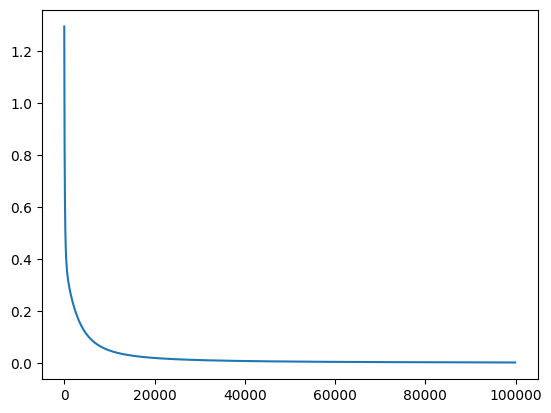

In [8]:

for i in range(100000):
    nonlinear = neuron(inputs)
    loss1 = nonlinear - tensor(trainy)
    loss2 = loss1**2
    loss3 = sum(loss2)
    if i % 1000:
        stats.append(loss3.data)

    for p in parameters:
        p.grad = None


    loss3.backward()
    lr = 0.0005
    for p in parameters:
        p.data = p.data - (lr * p.grad.data)

print( trainx, "\n", trainy, "\n", nonlinear, "\n", loss1, "\n", loss2, "\n", loss3, "\n", weights, "\n", bias )
for p in parameters:
    print(p.grad)
plt.plot(stats)

In [13]:
neuron(tensor([0.0, 0.0]))

tensor([0.0058], grad_fn=<TanhBackward0>)

In [14]:
neuron(tensor([1.0, 0.0]))

tensor([0.9617], grad_fn=<TanhBackward0>)

In [15]:
neuron(tensor([0.0, 1.0]))

tensor([0.9617], grad_fn=<TanhBackward0>)

In [16]:
neuron(tensor([1.0, 1.0]))

tensor([0.9992], grad_fn=<TanhBackward0>)